In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", 50)

# Load your dataset
df = pd.read_csv("train_and_test2.csv")
print(df.head())
print(df.info())


   Passengerid   Age     Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0            1  22.0   7.2500    0      1     0       0       0       0   
1            2  38.0  71.2833    1      1     0       0       0       0   
2            3  26.0   7.9250    1      0     0       0       0       0   
3            4  35.0  53.1000    1      1     0       0       0       0   
4            5  35.0   8.0500    0      0     0       0       0       0   

   zero.4  zero.5  zero.6  Parch  zero.7  zero.8  zero.9  zero.10  zero.11  \
0       0       0       0      0       0       0       0        0        0   
1       0       0       0      0       0       0       0        0        0   
2       0       0       0      0       0       0       0        0        0   
3       0       0       0      0       0       0       0        0        0   
4       0       0       0      0       0       0       0        0        0   

   zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  Embarked  zero.17  \
0  

In [2]:
# Rename confusing columns
df = df.rename(columns={"Passengerid": "PassengerId", "2urvived": "Survived"})

# Drop duplicate rows if any
df = df.drop_duplicates()

# Check missing values
print(df.isna().sum())

# Example: fill missing Age and Fare with median (if there are NaNs)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# If there are any purely constant 'zero' columns, drop them
constant_cols = [c for c in df.columns if df[c].nunique() == 1]
df = df.drop(columns=constant_cols)

print("Shape after cleaning:", df.shape)


PassengerId    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
Survived       0
dtype: int64
Shape after cleaning: (1309, 9)


               Age         Fare        sibsp        Parch
count  1309.000000  1309.000000  1309.000000  1309.000000
mean     29.503186    33.281086     0.498854     0.385027
std      12.905241    51.741500     1.041658     0.865560
min       0.170000     0.000000     0.000000     0.000000
25%      22.000000     7.895800     0.000000     0.000000
50%      28.000000    14.454200     0.000000     0.000000
75%      35.000000    31.275000     1.000000     0.000000
max      80.000000   512.329200     8.000000     9.000000


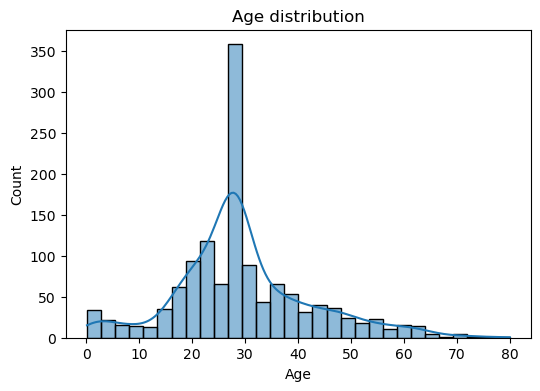

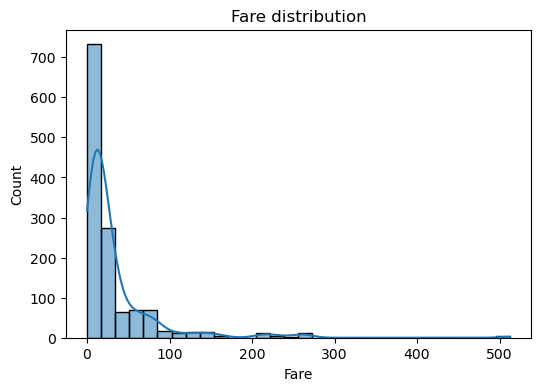

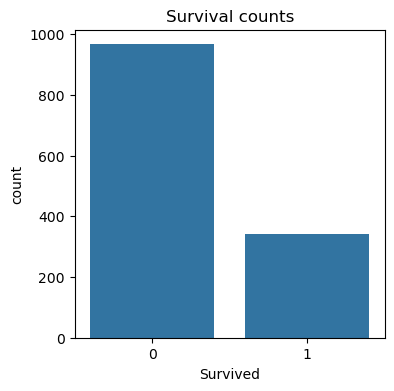

In [3]:
# Summary statistics
print(df[["Age", "Fare", "sibsp", "Parch"]].describe())

# Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Age distribution")
plt.show()

# Distribution of Fare
plt.figure(figsize=(6,4))
sns.histplot(df["Fare"], kde=True, bins=30)
plt.title("Fare distribution")
plt.show()

# Survived counts
plt.figure(figsize=(4,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival counts")
plt.show()


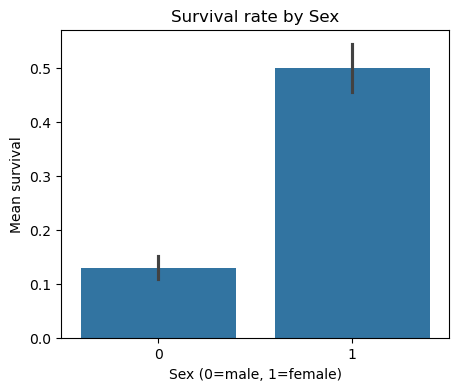

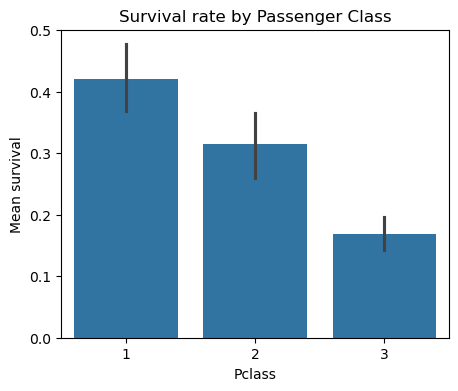

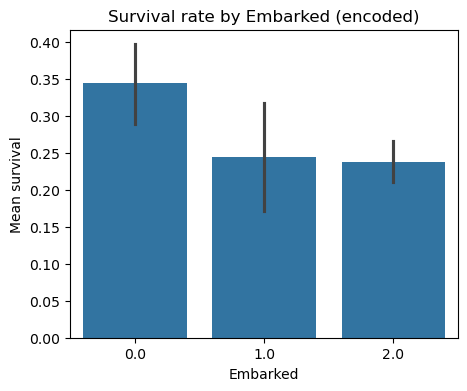

In [4]:
# Survival rate by Sex
plt.figure(figsize=(5,4))
sns.barplot(x="Sex", y="Survived", data=df, estimator=np.mean)
plt.title("Survival rate by Sex")
plt.xlabel("Sex (0=male, 1=female)")
plt.ylabel("Mean survival")
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(5,4))
sns.barplot(x="Pclass", y="Survived", data=df, estimator=np.mean)
plt.title("Survival rate by Passenger Class")
plt.ylabel("Mean survival")
plt.show()

# Survival rate by Embarked (encoded)
plt.figure(figsize=(5,4))
sns.barplot(x="Embarked", y="Survived", data=df, estimator=np.mean)
plt.title("Survival rate by Embarked (encoded)")
plt.ylabel("Mean survival")
plt.show()


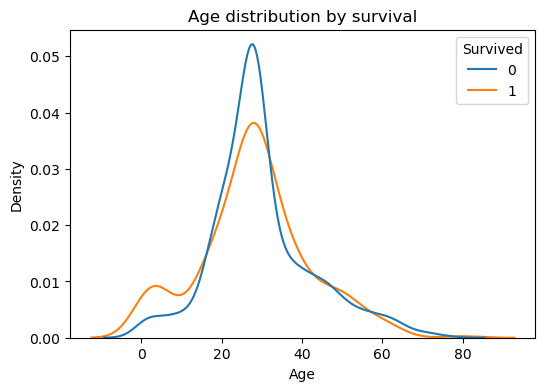

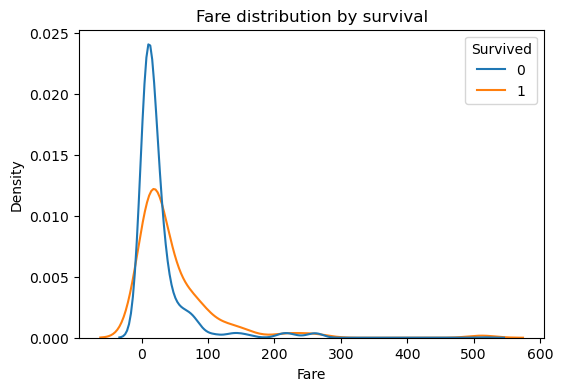

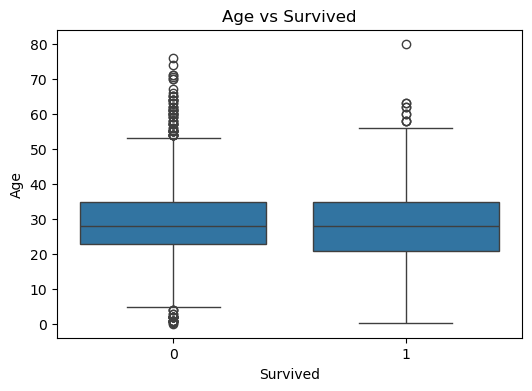

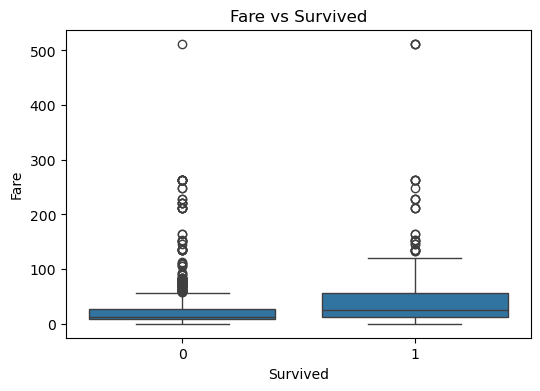

In [5]:
# Age vs Survived
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x="Age", hue="Survived", common_norm=False)
plt.title("Age distribution by survival")
plt.show()

# Fare vs Survived
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x="Fare", hue="Survived", common_norm=False)
plt.title("Fare distribution by survival")
plt.show()

# Boxplots
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survived")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survived")
plt.show()
